# Лабораторная работа №6  
## Машинное обучение  
### Выполнил Тюмин Илья, студент ИВТИИбд-32

1.С использованием библиотеки Keras загрузить обучающую выборку, создать модель сверточной сети, обучить ее на обучающей выборке, сохранить модель в файл.  
2.Написать дополнительно программу, которая загружает модель из файла, и предоставляет возможность загрузить файл или данные любым иным способом, чтобы проверить точность классификатора.

In [1]:
# импорты будут здесь
import tensorflow
from tensorflow import keras
from keras.datasets import cifar10 
from keras import models, layers, utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import cv2
import os

1.С использованием библиотеки Keras загрузить обучающую выборку, создать модель сверточной сети, обучить ее на обучающей выборке, сохранить модель в файл.

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.1, verbose=1)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 476s 671ms/step - accuracy: 0.3710 - loss: 1.6892 - val_accuracy: 0.5424 - val_loss: 1.2627
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 469s 666ms/step - accuracy: 0.5544 - loss: 1.2408 - val_accuracy: 0.5966 - val_loss: 1.1490
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 482s 685ms/step - accuracy: 0.6304 - loss: 1.0464 - val_accuracy: 0.6842 - val_loss: 0.8915
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 511s 726ms/step - accuracy: 0.6699 - loss: 0.9374 - val_accuracy: 0.7256 - val_loss: 0.7802
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 508s 721ms/step - accuracy: 0.7012 - loss: 0.8518 - val_accuracy: 0.7254 - val_loss: 0.7832
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 521s 741ms/step - accuracy: 0.7248 - loss: 0.7916 - val_accuracy: 0.7508 - val_loss: 0.7116
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 570s 752ms/step - accuracy: 0.7350 - loss: 0.7576 - val_accuracy: 0.7760 - val_loss: 0.6357
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 557s 791ms/step - accuracy: 0.7518 -

In [8]:
model.summary()
model.save('cifar10_model.keras') 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Точность: {test_acc:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,442,368 (9.32 MB)

 Trainable params: 814,122 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,628,246 (6.21 MB)

Точность: 0.7938


2.Написать дополнительно программу, которая загружает модель из файла, и предоставляет возможность загрузить файл или данные любым иным способом, чтобы проверить точность классификатора.

Тест.
Найдено 1 изображений:
  1. truck.jpg

Автотест первого изображения: truck.jpg


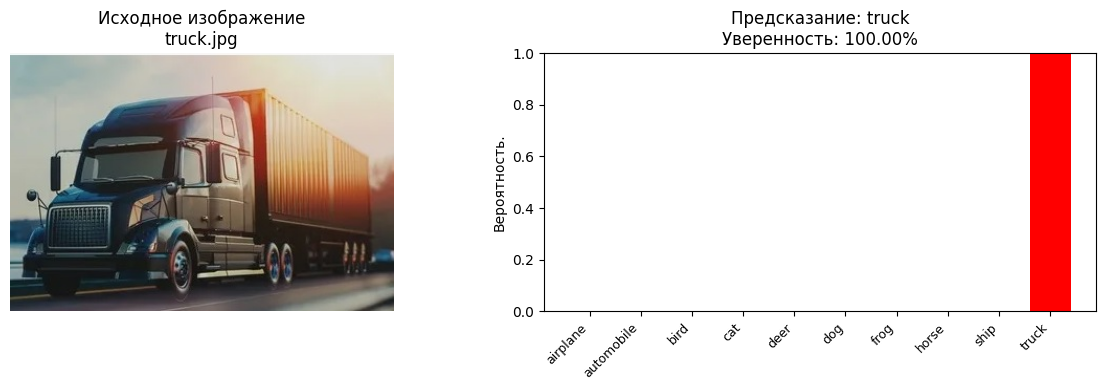

Результат: truck (уверенность: 100.00%)


In [2]:
import warnings
warnings.filterwarnings('ignore')
print("Тест.")
try:
    model = keras.models.load_model('cifar10_model.keras')
except Exception as e:
    print(f"Ошибка: {e}")
    exit()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def test_image(image_path):
    if not os.path.exists(image_path):
        print(f"Файл не найден: {image_path}")
        return None
    
    img = cv2.imread(image_path)
    if img is None:
        print("Не удалось загрузить изображение.")
        return None
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (32, 32))
    img_normalized = img_resized.astype('float32') / 255.0
    
    prediction = model.predict(img_normalized.reshape(1, 32, 32, 3), verbose=0)
    pred_class = np.argmax(prediction)
    confidence = np.max(prediction)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.imshow(img_rgb)
    ax1.set_title(f"Исходное изображение\n{os.path.basename(image_path)}")
    ax1.axis('off')
    
    colors = ['gray'] * len(class_names)
    colors[pred_class] = 'red'
    bars = ax2.bar(range(len(class_names)), prediction[0], color=colors)
    ax2.set_xticks(range(len(class_names)))
    ax2.set_xticklabels(class_names, rotation=45, ha='right', fontsize=9)
    ax2.set_ylabel("Вероятность.")
    ax2.set_title(f"Предсказание: {class_names[pred_class]}\nУверенность: {confidence:.2%}")
    ax2.set_ylim([0, 1])
    
    plt.tight_layout()
    plt.show()
    
    print(f"Результат: {class_names[pred_class]} (уверенность: {confidence:.2%})")
    return class_names[pred_class], confidence

image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
found_images = []

for file in os.listdir('.'):
    if any(file.lower().endswith(ext) for ext in image_extensions):
        found_images.append(file)

if found_images:
    print(f"Найдено {len(found_images)} изображений:")
    for i, img in enumerate(found_images[:5], 1):
        print(f"  {i}. {img}")
    if len(found_images) > 5:
        print(f"  ... и еще {len(found_images) - 5} изображений")
    
    print(f"\nАвтотест первого изображения: {found_images[0]}")
    test_image(found_images[0])
else:
    print("Изображения не найдены в текущей папке")